In [1]:
import pandas as pd

df = pd.read_excel('yelp.xlsx') 
df.head() 

C:\Users\Tandin Jamtsho\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


name   category_0       category_1  take_out  \
0  China Sea Chinese Restaurant  Restaurants          Chinese      True   
1          Discount Tire Center        Tires       Automotive     False   
2                  Frankfurters  Restaurants         Hot Dogs      True   
3             Fred Dietz Floral     Shopping  Flowers & Gifts     False   
4                 Kuhn's Market         Food          Grocery     False   

   review_count  stars  city_id  state_id  
0          11.0    2.5        1         1  
1          24.0    4.5        1         1  
2           3.0    4.5        1         1  
3           6.0    4.0        1         1  
4           8.0    3.5        1         1

In [8]:
locdf=df.loc[:, 'category_0':'take_out'] 
locdf 

category_0                       category_1  take_out
0       Restaurants                          Chinese      True
1             Tires                       Automotive     False
2       Restaurants                         Hot Dogs      True
3          Shopping                  Flowers & Gifts     False
4              Food                          Grocery     False
..              ...                              ...       ...
595  Local Services                 Recycling Center     False
596  Local Services                 Recycling Center     False
597     Restaurants                        Fast Food      True
598        Shopping  Heating & Air Conditioning/HVAC     False
599      Automotive                           Towing     False

[600 rows x 3 columns]

In [9]:
col = df.columns[-4:]
locdf1=df.loc[:, col]
locdf1

review_count  stars  city_id  state_id
0            11.0    2.5        1         1
1            24.0    4.5        1         1
2             3.0    4.5        1         1
3             6.0    4.0        1         1
4             8.0    3.5        1         1
..            ...    ...      ...       ...
595           7.0    2.5       13         2
596           3.0    1.5       13         2
597          12.0    3.0       13         2
598           9.0    4.0       13         2
599           4.0    1.0       13         2

[600 rows x 4 columns]

In [10]:
iloc=df.iloc[:, :4]
iloc

name      category_0  \
0                         China Sea Chinese Restaurant     Restaurants   
1                                 Discount Tire Center           Tires   
2                                         Frankfurters     Restaurants   
3                                    Fred Dietz Floral        Shopping   
4                                        Kuhn's Market            Food   
..                                                 ...             ...   
595  Republic Services of Southern Nevada Recycling...  Local Services   
596                                       SA Recycling  Local Services   
597                                    Jack In the Box     Restaurants   
598                               Custom Hearth & Door        Shopping   
599                                   A Sunrise Towing      Automotive   

                          category_1  take_out  
0                            Chinese      True  
1                         Automotive     False  
2                           Hot Dogs      True  
3                    Flowers & Gifts     False  
4                            Grocery     False  
..                               ...       ...  
595                 Recycling Center     False  
596                 Recycling Center     False  
597                        Fast Food      True  
598  Heating & Air Conditioning/HVAC     False  
599                           Towing     False  

[600 rows x 4 columns]

In [4]:
df.duplicated(subset=["name"]).sum()


34

In [6]:
name=df.name.unique()
name

array(['China Sea Chinese Restaurant', 'Discount Tire Center',
       'Frankfurters', 'Fred Dietz Floral', "Kuhn's Market",
       'Lincoln Bakery', "Luigi's Pizzeria", 'Mane Attractions Unlimited',
       "R & B's Pizza Place", 'Rusty Nail', 'Star Nails', 'Vivo',
       "Emil's Lounge", 'Grand View Golf Club', 'Advance Auto Parts',
       "Alexion's Bar & Grill", 'Alteration World', 'Amerifit',
       "Barb's Country Junction Cafe", 'Carnegie Free Library',
       'Don Don Chinese Restaurant',
       'Extended Stay America - Pittsburgh - Carnegie',
       "Flynn's Tire & Auto Service", 'Forsythe Miniature Golf & Snacks',
       'Gab & Eat', 'Heidelberg B P', 'Kings Family Restaurant',
       "Knorr's Sunoco Service", "Paddy's Pour House", "Papa J's",
       'Porto Fino Pizzaria & Gyro', 'Quaker State Construction',
       "Rocky's Lounge", 'Rossi Tailoring & Cleaners', "Shop N' Save",
       'Weinberg Lisa, DMD', 'Barnes & Noble Booksellers',
       'Bath & Body Works', 'Bed Bath & Be

In [14]:
drop=df.drop_duplicates(["name"])
drop.shape

(566, 8)

In [15]:
df.isna().sum()

name            0
category_0      0
category_1      0
take_out        0
review_count    3
stars           2
city_id         0
state_id        0
dtype: int64

In [16]:
df.dtypes

name             object
category_0       object
category_1       object
take_out           bool
review_count    float64
stars           float64
city_id           int64
state_id          int64
dtype: object

In [19]:
ndf = df.select_dtypes(include=['float64', 'int64'])
ndf

review_count  stars  city_id  state_id
0            11.0    2.5        1         1
1            24.0    4.5        1         1
2             3.0    4.5        1         1
3             6.0    4.0        1         1
4             8.0    3.5        1         1
..            ...    ...      ...       ...
595           7.0    2.5       13         2
596           3.0    1.5       13         2
597          12.0    3.0       13         2
598           9.0    4.0       13         2
599           4.0    1.0       13         2

[600 rows x 4 columns]

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

imputdf = imputer.fit_transform(ndf)
imputdf

array([[11. ,  2.5,  1. ,  1. ],
       [24. ,  4.5,  1. ,  1. ],
       [ 3. ,  4.5,  1. ,  1. ],
       ...,
       [12. ,  3. , 13. ,  2. ],
       [ 9. ,  4. , 13. ,  2. ],
       [ 4. ,  1. , 13. ,  2. ]])

In [24]:
newdf = pd.DataFrame(data=imputdf, columns = ndf.columns)
newdf

review_count  stars  city_id  state_id
0            11.0    2.5      1.0       1.0
1            24.0    4.5      1.0       1.0
2             3.0    4.5      1.0       1.0
3             6.0    4.0      1.0       1.0
4             8.0    3.5      1.0       1.0
..            ...    ...      ...       ...
595           7.0    2.5     13.0       2.0
596           3.0    1.5     13.0       2.0
597          12.0    3.0     13.0       2.0
598           9.0    4.0     13.0       2.0
599           4.0    1.0     13.0       2.0

[600 rows x 4 columns]

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('loan_train.csv')
df.head()   


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [28]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
numdf = df.select_dtypes(include=['float64', 'int64'])
numdf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [33]:
numdf.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

data = imputer.fit_transform(numdf)
data

array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

In [39]:
# create DataFrame

newdf = pd.DataFrame(data, columns = numdf.columns)
newdf

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0  146.412162             360.0   
1             4583.0             1508.0  128.000000             360.0   
2             3000.0                0.0   66.000000             360.0   
3             2583.0             2358.0  120.000000             360.0   
4             6000.0                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0   71.000000             360.0   
610           4106.0                0.0   40.000000             180.0   
611           8072.0              240.0  253.000000             360.0   
612           7583.0                0.0  187.000000             360.0   
613           4583.0                0.0  133.000000             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [40]:
newdf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

C:\Users\Tandin Jamtsho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


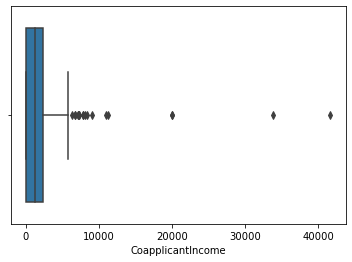

In [42]:
# ourlier detection
y = newdf['CoapplicantIncome']
sns.boxplot(y)
plt.show()


In [45]:
# remove  outlier

Q1 = newdf.CoapplicantIncome.quantile(0.25) # interquartile range method
Q3 = newdf.CoapplicantIncome.quantile(0.75)

IQR = Q3-Q1

upperlimit = Q3 + (IQR*1.5)
lowerlimit = Q1 - (IQR*1.5)


In [47]:
outlierfree = newdf[(newdf.CoapplicantIncome>lowerlimit) & (newdf.CoapplicantIncome < upperlimit)]
outlierfree.shape

(596, 5)

In [50]:
storedeleted = newdf[(newdf.CoapplicantIncome < lowerlimit) | (newdf.CoapplicantIncome > upperlimit)]
storedeleted.shape

(18, 5)

C:\Users\Tandin Jamtsho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

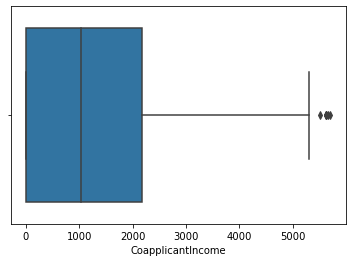

In [52]:
# verify whether remove outlier or not

sns.boxplot(outlierfree['CoapplicantIncome'])  

In [62]:
#outlier detection using standard deviation

std = newdf.CoapplicantIncome.std()
mean = newdf.CoapplicantIncome.mean()

upperlim = mean + (3*std)
lowerlim = mean - (3*std)

In [64]:
stddf= newdf[(newdf.CoapplicantIncome > lowerlim) & (newdf.CoapplicantIncome < upperlim)]
stddf.shape

(612, 5)

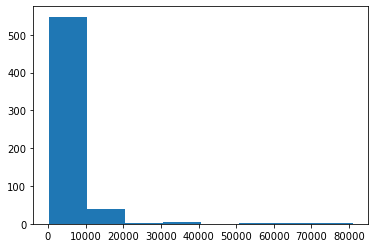

In [82]:
# Feature Transformation

plt.hist(outlierfree['ApplicantIncome'], bins=8)
plt.show()

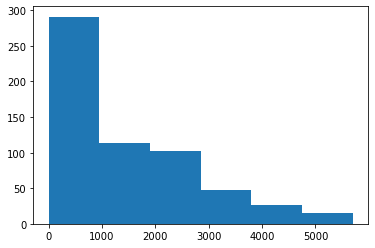

In [91]:
plt.hist(outlierfree['CoapplicantIncome'], bins=6)
plt.show()

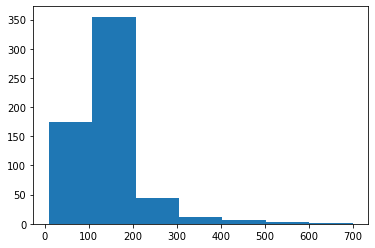

In [93]:
plt.hist(outlierfree['LoanAmount'], bins = 7)
plt.show()

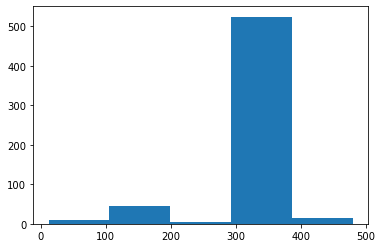

In [97]:
plt.hist(outlierfree['Loan_Amount_Term'], bins = 5)
plt.show()

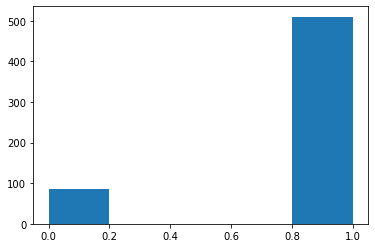

In [99]:
plt.hist(outlierfree['Credit_History'], bins = 5)
plt.show()

In [75]:
numdf.head(2)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   

   Credit_History  
0             1.0  
1             1.0

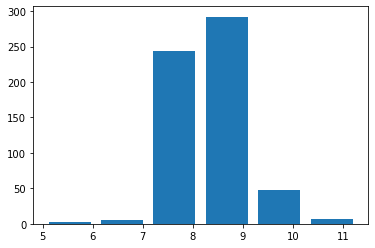

In [109]:
# Features Trabsformation
# 1. Logotithemic Transformation

import numpy as np

lt = np.log(outlierfree['ApplicantIncome'])
plt.hist(lt, bins=6, rwidth=0.8 )
plt.show()

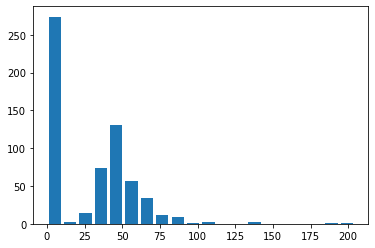

In [110]:
# 
sqrt=np.sqrt(newdf['CoapplicantIncome'])
plt.hist(sqrt, bins=20, rwidth=0.8)
plt.show()

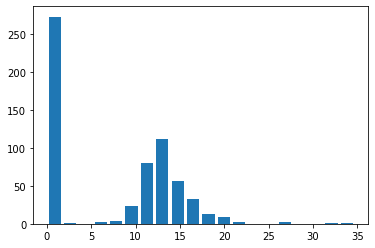

In [112]:
cube=np.cbrt(newdf['CoapplicantIncome'])
plt.hist(cube, bins=20, rwidth=0.8)
plt.show()

In [113]:
# Fedature Scaling